<a href="https://colab.research.google.com/github/manomadhivanan/AI-driven-insights-for-water-quality-production-using-ML/blob/main/water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WATER QUALITY PREDICTIONS**

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [48]:
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [49]:
df.shape

(6552, 10)

In [50]:
df.isnull().sum()

,0
ph,982
Hardness,0
Solids,0
Chloramines,0
Sulfate,1562
Conductivity,0
Organic_carbon,0
Trihalomethanes,324
Turbidity,0
Potability,0


In [51]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [52]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
6547,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
6548,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
6549,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
6550,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [53]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [54]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469844,32.877252,8767.901548,1.582964,36.139854,80.817895,3.307909,15.768678,0.780323,0.487812
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [55]:
df.nunique()

,0
ph,2786
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2496
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3115
Turbidity,3276
Potability,2


In [56]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [57]:
# plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(), annot=True)
# plt.show()

<Figure size 1500x1000 with 0 Axes>

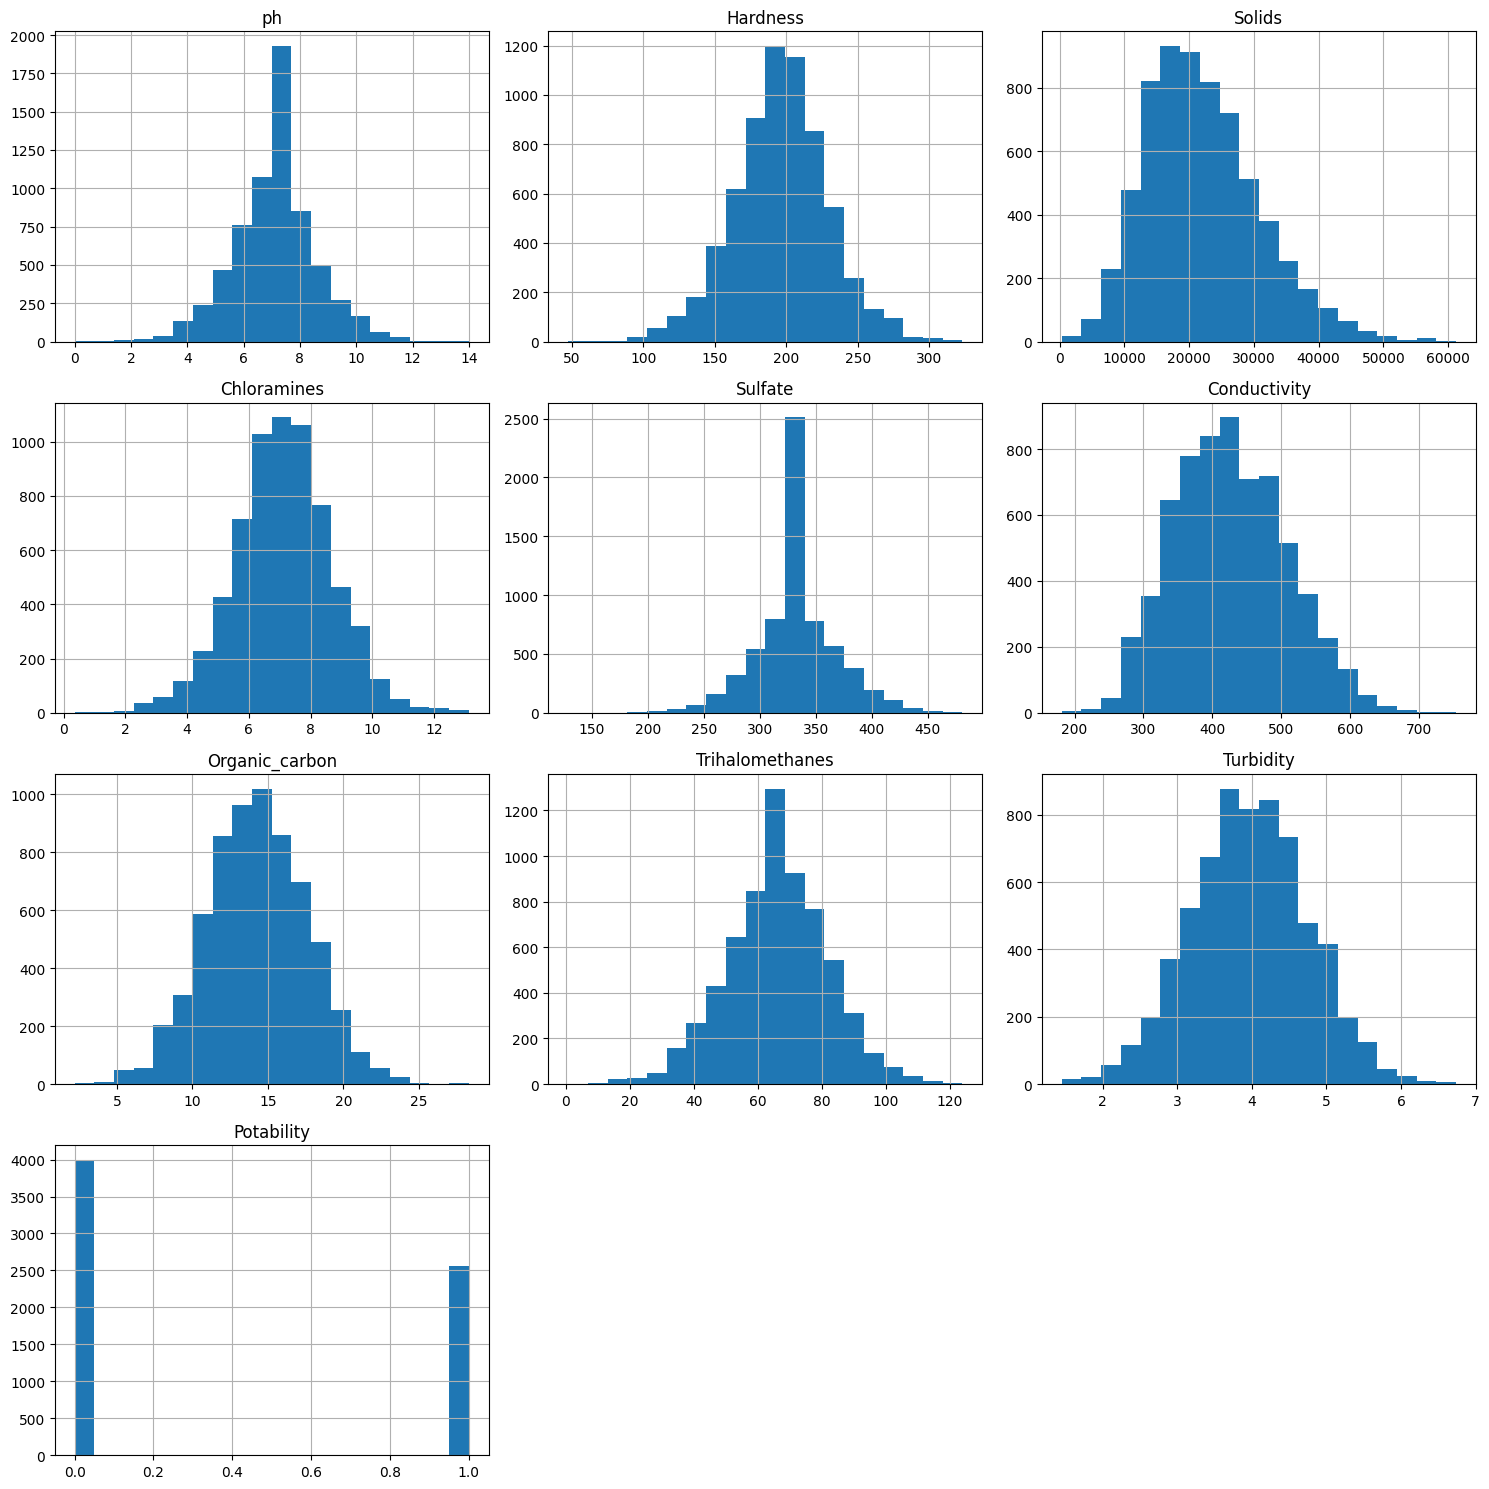

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for plots
plt.figure(figsize=(15, 10))

# Plot histograms for all numeric columns
df.hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

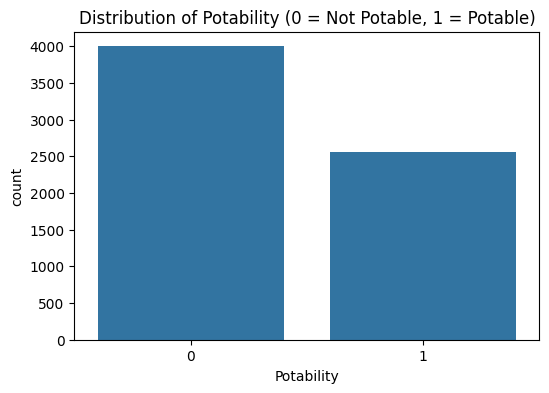

In [59]:
# Check distribution of the 'Potability' target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability (0 = Not Potable, 1 = Potable)')
plt.show()

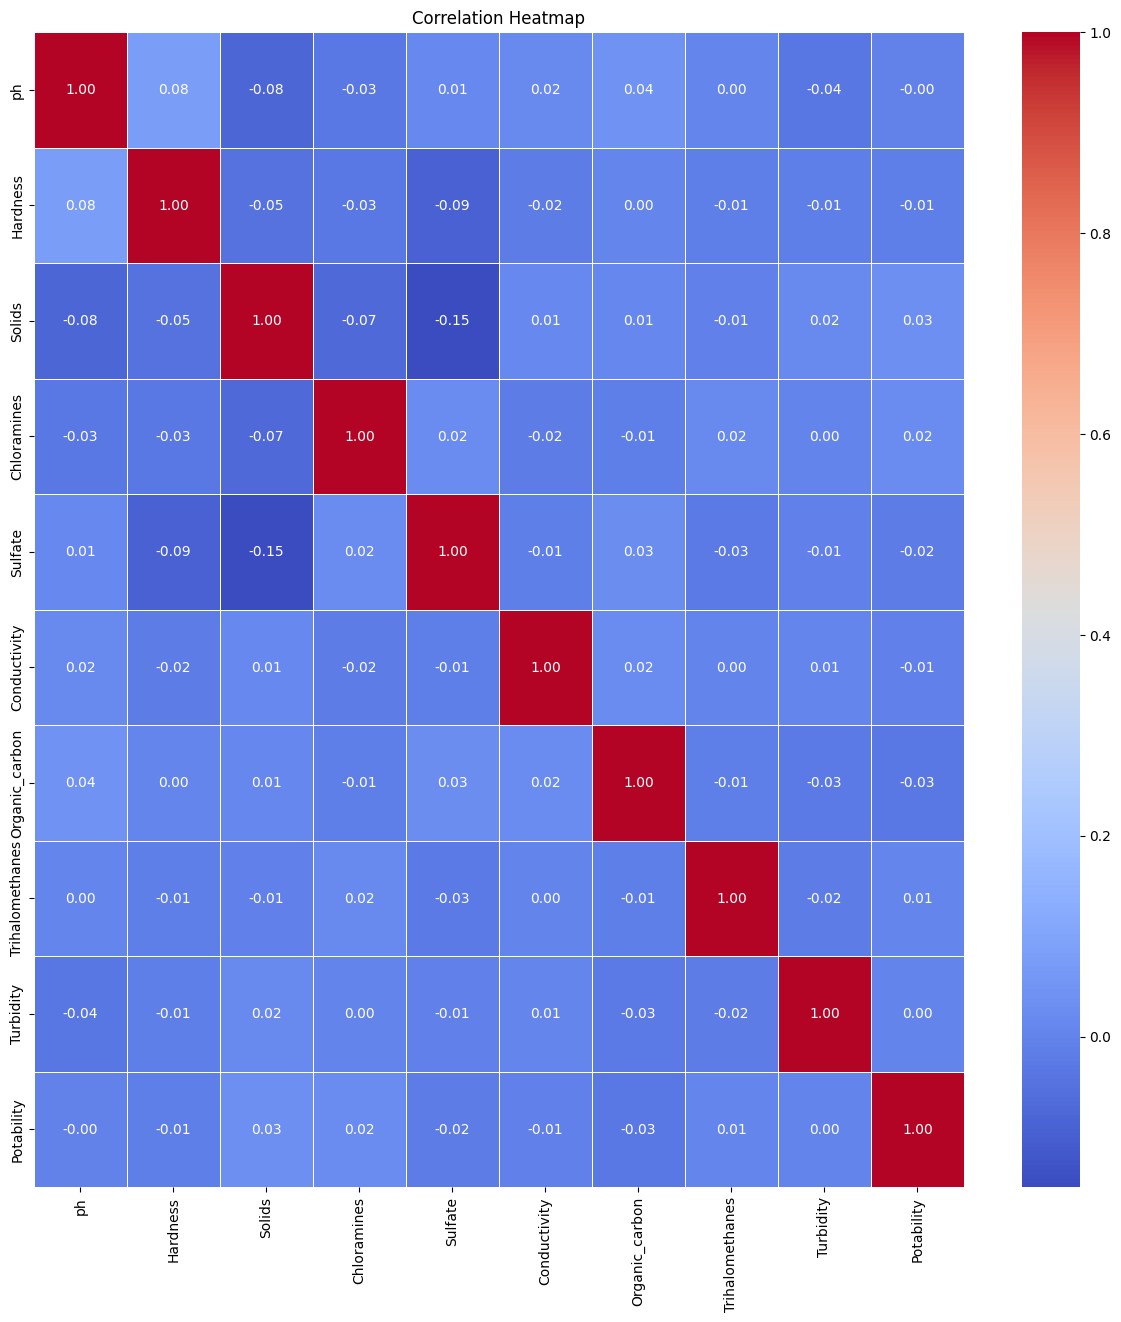

In [60]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# Check for skewness in the numerical columns
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print("Skewness of features:\n", skewness)

# Plot histograms for features with high skewness
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if abs(df[col].skew()) > 1:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} Distribution with Skewness')
        plt.show()

Skewness of features:
 ph                 0.027790
Hardness          -0.039333
Solids             0.621492
Chloramines       -0.012096
Sulfate           -0.041175
Conductivity       0.264430
Organic_carbon     0.025527
Trihalomethanes   -0.085142
Turbidity         -0.007815
Potability         0.450681
dtype: float64


In [62]:
# Correlation with Potability
correlation_with_target = df.corr()['Potability'].sort_values(ascending=False)
print(correlation_with_target)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
Name: Potability, dtype: float64


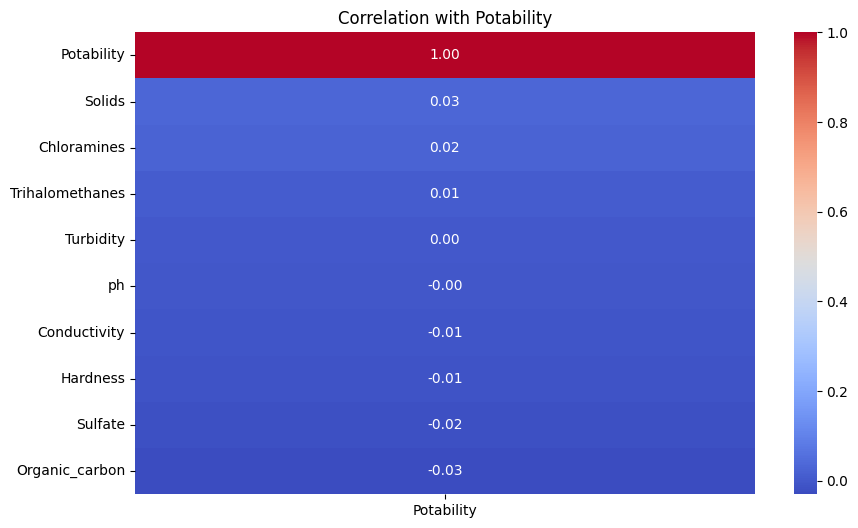

In [63]:
# Visualizing correlation between Potability and other features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['Potability']].sort_values(by='Potability', ascending=False), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Potability')
plt.show()

[]

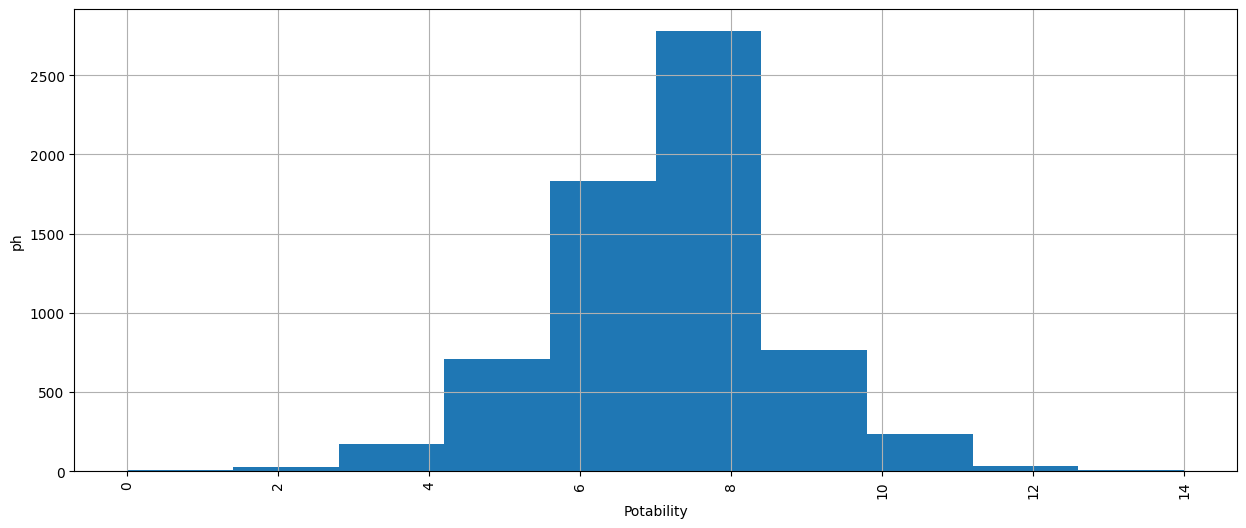

In [64]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.ph.hist()
plt.xlabel('Potability')
plt.ylabel('ph')
plt.plot()

<Axes: xlabel='Potability', ylabel='Turbidity'>

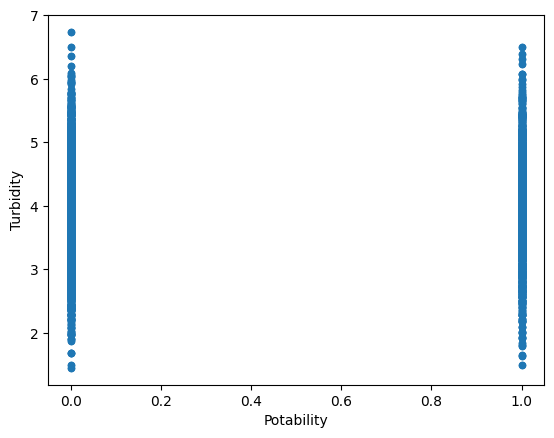

In [65]:
df.plot(kind="scatter", x="Potability", y="Turbidity")

In [66]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
6547,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
6548,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
6549,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
6550,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [67]:
X = df.drop(['Potability'], axis=1)
Y = df['Potability']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5241, 9) (1311, 9) (5241,) (1311,)


In [69]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [70]:
print(lr.score(X_train, Y_train))

0.6143865674489601


In [71]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,
                                  random_state=42)
reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [72]:
print(reg.score(X_train, Y_train))

0.9604398738773834


In [73]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [74]:
print(clf.score(X_train, Y_train))

0.6149589772944095


## **Predictions**

In [75]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
6547,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
6548,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
6549,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
6550,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [76]:
Y

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
6547,1
6548,1
6549,1
6550,1


In [77]:
Result= reg.predict(np.array([[7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135]]))

In [78]:
if int(Result[0])==1:
    print('Output : ', 'Potable ')
else:
    print('Output : ', ' Not potable')

Output :   Not potable


In [79]:
import joblib
joblib.dump(reg, 'RF_model.pkl')

['RF_model.pkl']